In [1]:
import numpy as np
import matplotlib.pyplot as plt

Iteration 1: Cost: 4352.083083744521, weight         0.7593345028242496, Bias 0.022885572506290003
Iteration 2: Cost: 1114.817366591461, weight         1.081604929130107, Bias 0.029180018013127675
Iteration 3: Cost: 341.41152066934967, weight         1.2391247497170879, Bias 0.03225284414454711
Iteration 4: Cost: 156.63935310732103, weight         1.3161175608251625, Bias 0.03375100309956893
Iteration 5: Cost: 112.49596534948674, weight         1.3537502783703066, Bias 0.03447949425748263
Iteration 6: Cost: 101.94979507386476, weight         1.372144519591523, Bias 0.0348317862332497
Iteration 7: Cost: 99.43023943657744, weight         1.381135354017443, Bias 0.03500019911424253
Iteration 8: Cost: 98.82829922641693, weight         1.3855299793739788, Bias 0.03507873535605857
Iteration 9: Cost: 98.68449100490524, weight         1.3876780638468758, Bias 0.03511334159786107
Iteration 10: Cost: 98.65013377969862, weight         1.3887280812243743, Bias 0.03512647569606427
Iteration 11: Cos

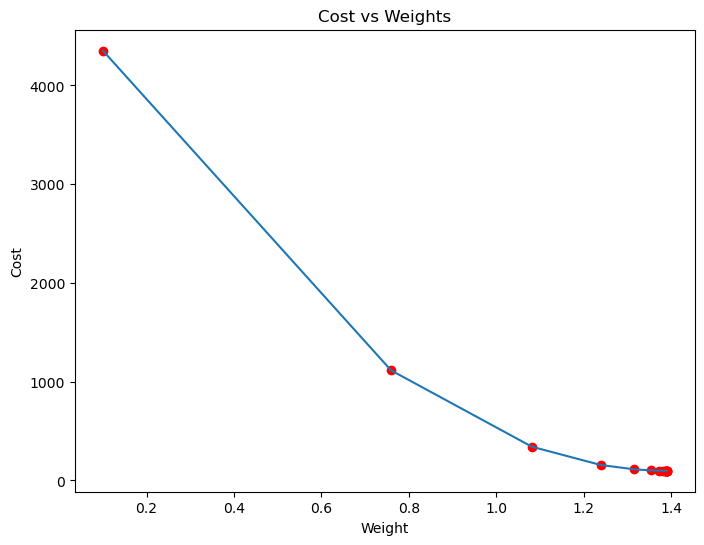

Estimated Weight: 1.389726196905021
Estimated Bias: 0.0350942048929339


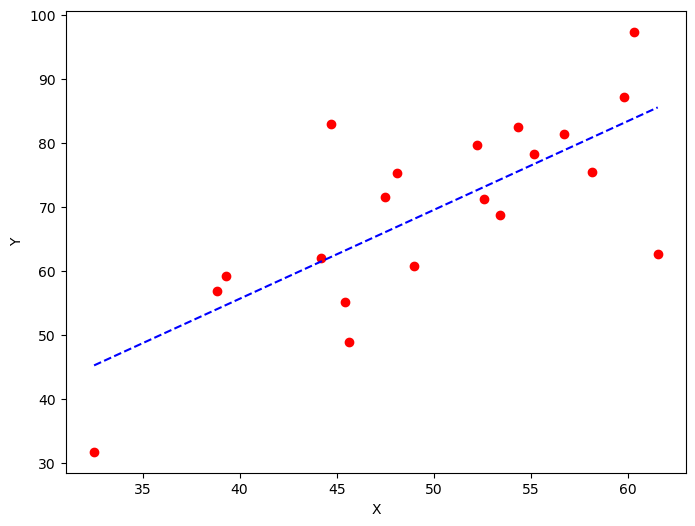

In [2]:
def mean_squared_error(y_true, y_predicted):
    
    #calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

# Gradient Descent Function 
# Here iterations, Learning_rate, stopping_threshold
# are hyperparameters that can be tuned

def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, stopping_threshold = 1e-6):
    
    # Initializing weight, bias, learning rate and functions
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
    
    costs = []
    weights = []
    previous_cost = None
    
    # Estimations of optimal parameters
    for i in range(iterations):
        
        # making predictions
        y_predicted = (current_weight * x) + current_bias
        
        # Calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)
        
        # If the change in cost is less than ot equal to
        # stopping threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
            
        previous_cost = current_cost
        
        costs.append(current_cost)
        weights.append(current_weight)
        
        # Calculating the gradient
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
        
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
        
        # Printing the parameters for each 1000th iterations
        print(f"Iteration {i+1}: Cost: {current_cost}, weight \
        {current_weight}, Bias {current_bias}")
        
        
    # Visualizing weights and costs for all iterations
    plt.figure(figsize = (8, 6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker = 'o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
        
    return current_weight, current_bias
    
def main():
        
        #Data
        X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
                      55.14218841, 52.21179669, 39.29956669, 48.10584169, 52.55801444,
                      45.41973014, 54.35163488, 44.1640495, 58.16847072, 56.72720886, 
                      48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
        
        Y = np.array([31.70700585, 68.77759598, 62.5623823, 71.54663223, 87.23092513,
                      78.21151827, 79.64197305, 59.17148932, 75.3312423, 71.30087989,
                      55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
                      60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])
        
        
        # Estimating weight and bias using gradient descent
        estimated_weight, estimated_bias = gradient_descent(X, Y, iterations = 2000)
        print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
        
        # Making predictions using estimated parameters
        Y_pred = estimated_weight * X + estimated_bias
        
        # Plotting the regression line
        plt.figure(figsize = (8, 6))
        plt.scatter(X, Y, marker = 'o', color='red')
        plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue', 
                 markerfacecolor = 'red', markersize = 10, linestyle='dashed')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
        
if __name__ == "__main__":
    main()  